#*Import Libraries*

In [22]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#*Import Dataset*

In [23]:
pip install ucimlrepo

In [24]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

#*Vizualisation Before PreProcessing*

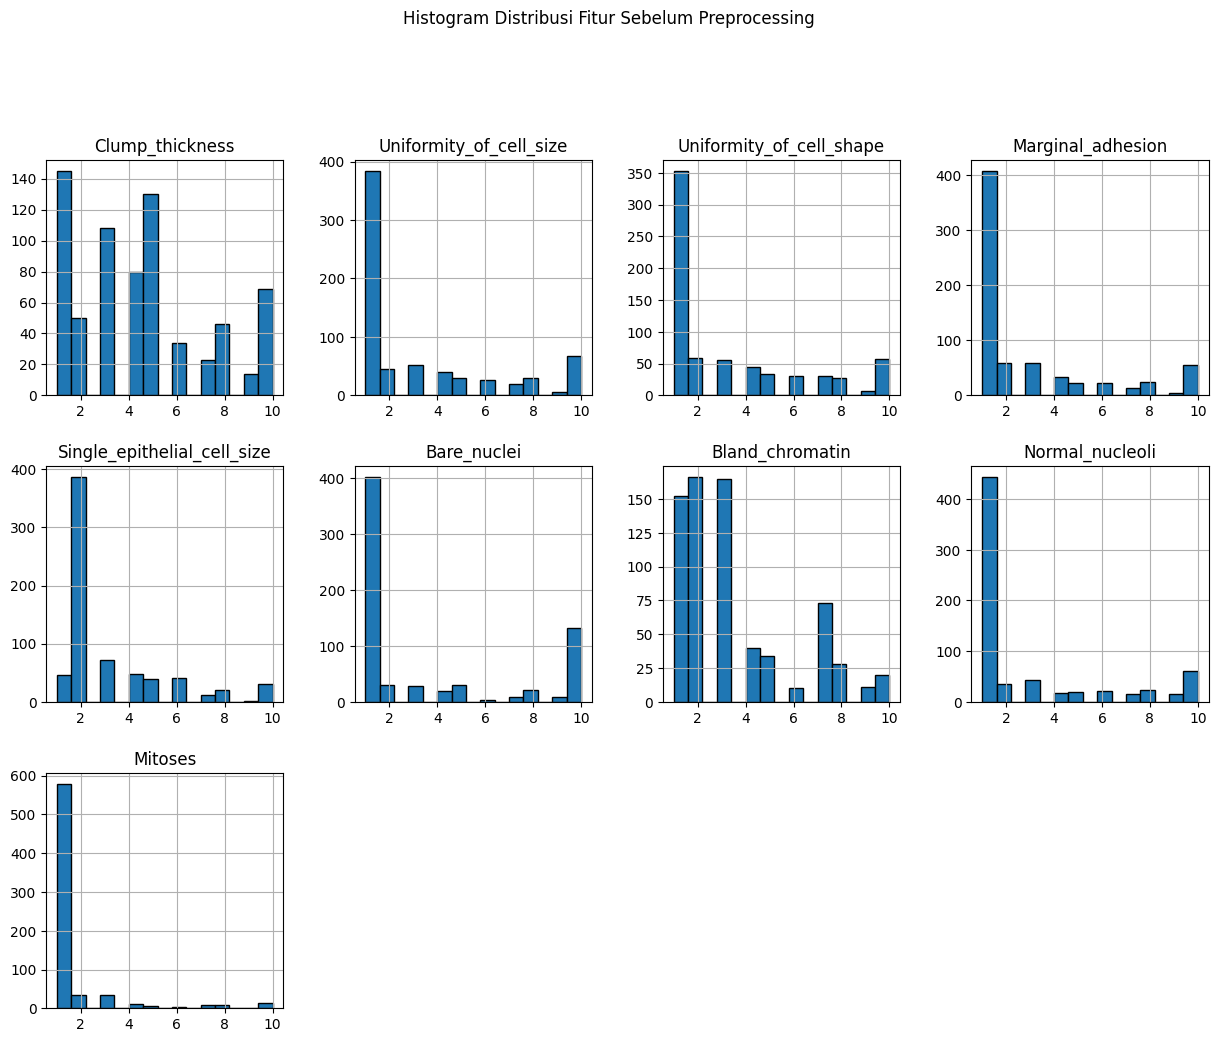

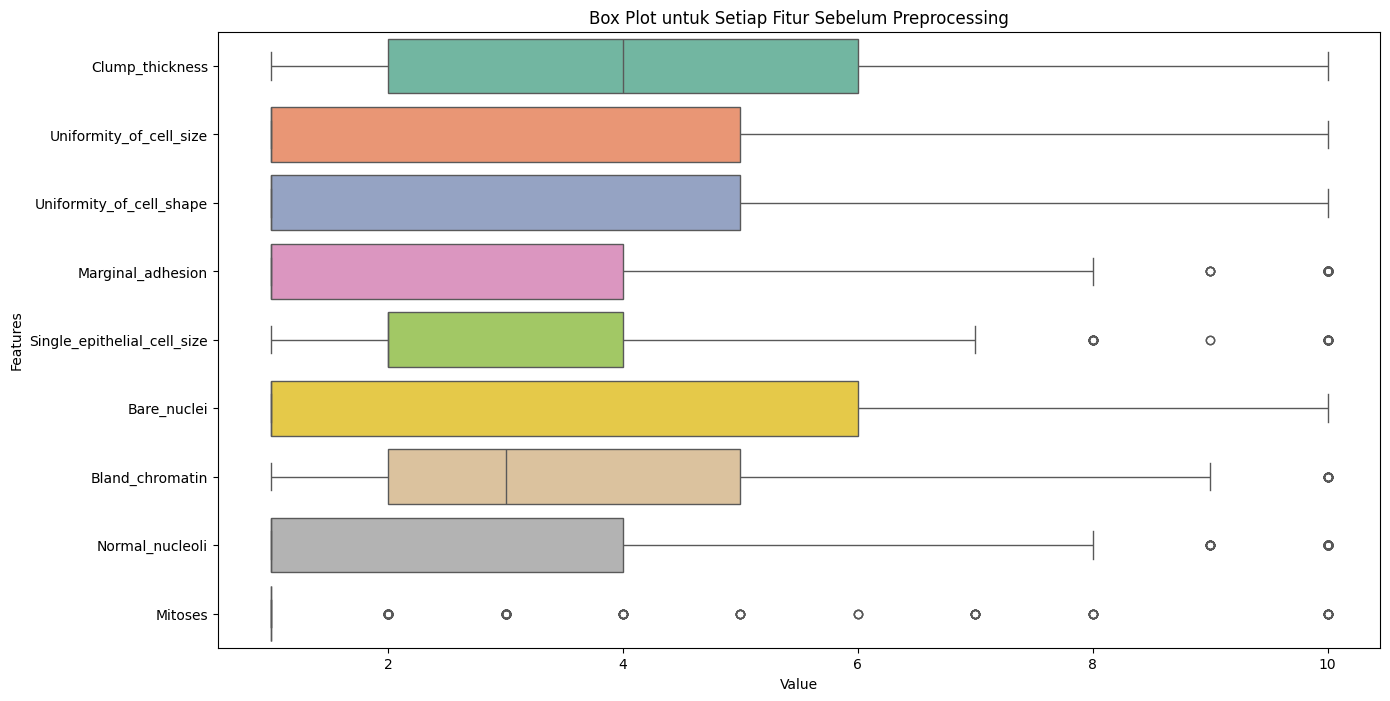

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengonversi dataset X ke DataFrame untuk memudahkan visualisasi
X_df_before = pd.DataFrame(X, columns=X.columns)

# Histogram sebelum preprocessing
X_df_before.hist(bins=15, figsize=(15, 15), layout=(4, 4), edgecolor='black')
plt.suptitle('Histogram Distribusi Fitur Sebelum Preprocessing')
plt.show()

# Box plot sebelum preprocessing
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_df_before, orient="h", palette="Set2")
plt.title('Box Plot untuk Setiap Fitur Sebelum Preprocessing')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

#*Preprocessing Data*

In [26]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Mengambil dataset dari UCI ML Repository menggunakan ucimlrepo
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# Mengambil fitur (X) dan target (y)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# Ganti '?' dengan NaN untuk menandai nilai yang hilang pada dataset
X = X.replace('?', np.nan)

# Mengonversi seluruh data ke tipe numerik (coerce untuk NaN jika gagal)
X = X.apply(pd.to_numeric, errors='coerce')

# Mengisi nilai NaN dengan median kolom terkait
X = X.fillna(X.median())

# Ubah y menjadi bentuk array 1-dimensi dengan .ravel() jika y masih berbentuk 2D
y = y.values.ravel()

# Konversi target y ke dalam format pandas Series
y = pd.Series(y)

# Ubah label target menjadi biner
# 2 untuk benign menjadi 0, 4 untuk malignant menjadi 1
y = y.map({2: 0, 4: 1})

# Pastikan tidak ada nilai yang hilang setelah preprocessing
print("Jumlah nilai NaN pada setiap kolom setelah preprocessing:")
print(X.isnull().sum())

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tampilkan beberapa baris pertama untuk memverifikasi data setelah preprocessing
print("Data setelah normalisasi (5 baris pertama):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# Tampilkan target setelah konversi
print("Target setelah konversi (5 baris pertama):")
print(y.head())


Jumlah nilai NaN pada setiap kolom setelah preprocessing:
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64
Data setelah normalisasi (5 baris pertama):
   Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0         0.206936                -0.699995                 -0.743299   
1         0.206936                 0.283845                  0.266875   
2        -0.503866                -0.699995                 -0.743299   
3         0.562336                 1.595632                  1.613773   
4        -0.148465                -0.699995                 -0.743299   

   Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0          -0.633247                    -0.549561    -0.686979   
1           0.768

#*Vizualisation*

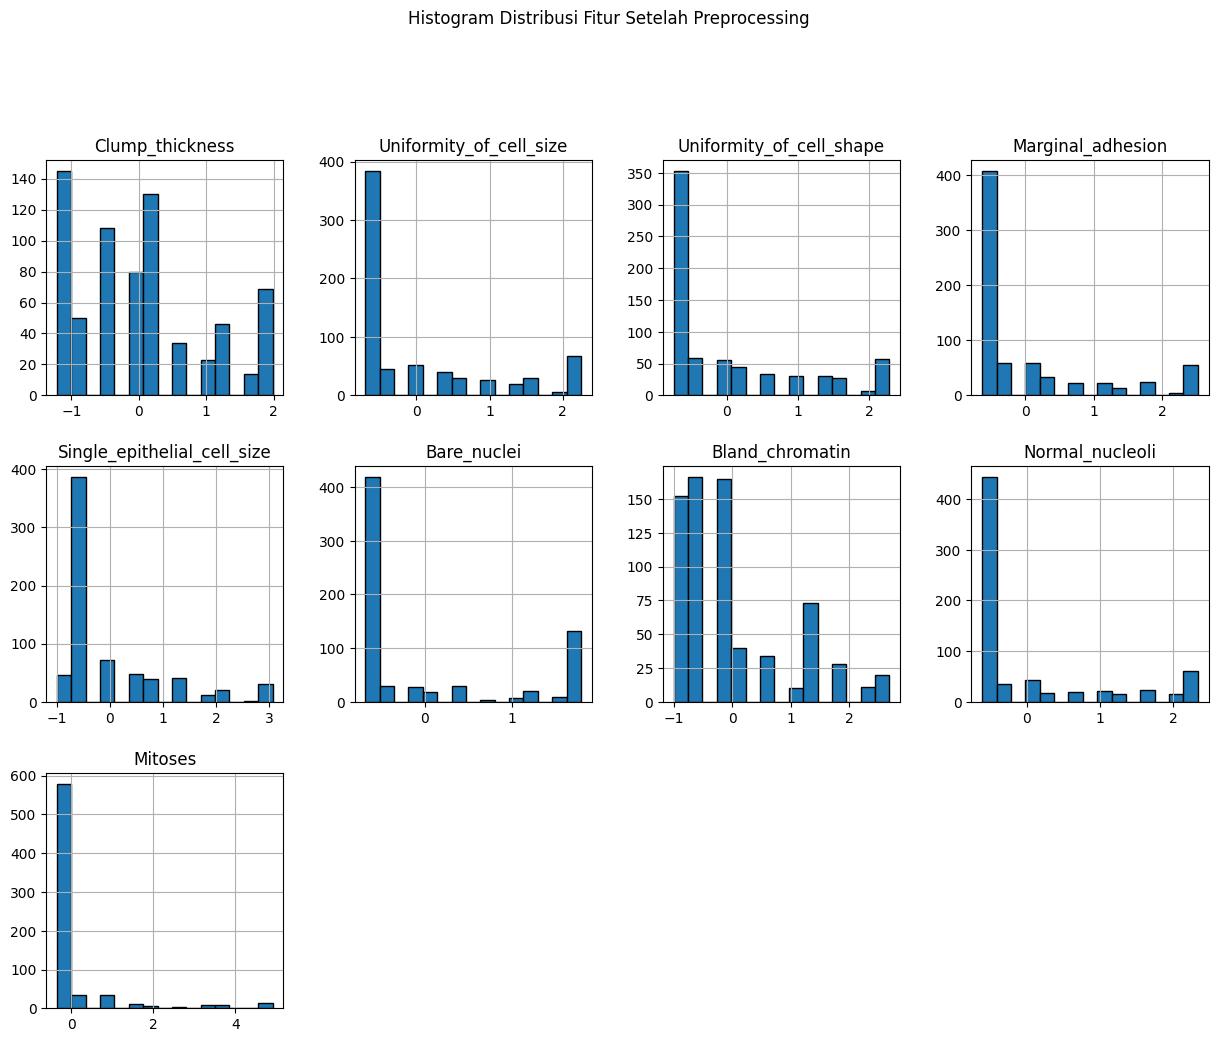

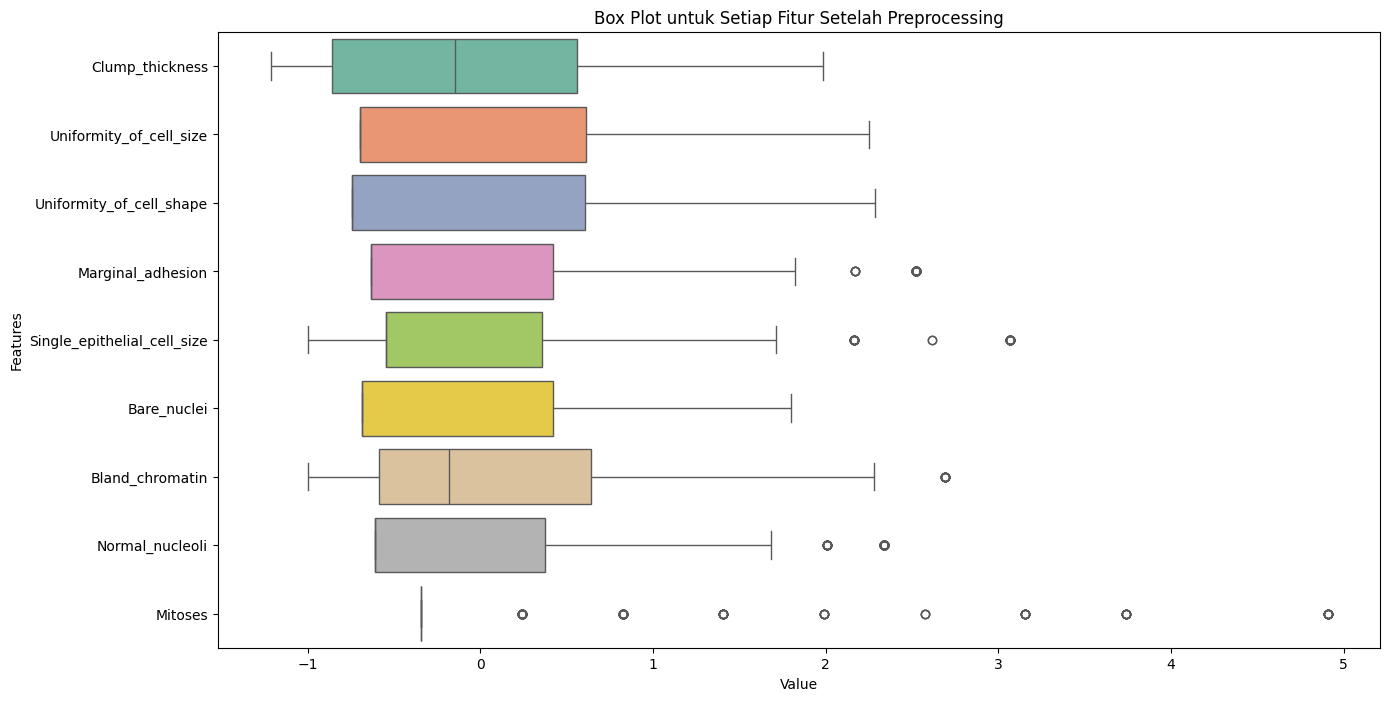

In [27]:
# Mengonversi dataset X_scaled ke DataFrame untuk memudahkan visualisasi
X_df_after = pd.DataFrame(X_scaled, columns=X.columns)

# Histogram setelah preprocessing
X_df_after.hist(bins=15, figsize=(15, 15), layout=(4, 4), edgecolor='black')
plt.suptitle('Histogram Distribusi Fitur Setelah Preprocessing')
plt.show()

# Box plot setelah preprocessing
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_df_after, orient="h", palette="Set2")
plt.title('Box Plot untuk Setiap Fitur Setelah Preprocessing')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

#*Membuat dan Melakukan K-Fold Cross Validation dengan XGBoost*

In [28]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# Inisialisasi model XGBoost
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# K-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross_val_score untuk akurasi
cv_results = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')

# Menampilkan hasil rata-rata akurasi dan standar deviasi
print(f'Average Accuracy with XGBoost: {cv_results.mean():.4f}')
print(f'Standard Deviation with XGBoost: {cv_results.std():.4f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Average Accuracy with XGBoost: 0.9571
Standard Deviation with XGBoost: 0.0144


#*Evaluasi Model dan Metrik Evaluasi*

In [29]:
# Membagi data ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:03:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[93  2]
 [ 5 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        95
           1       0.95      0.89      0.92        45

    accuracy                           0.95       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.95      0.95      0.95       140

Accuracy: 0.9500


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report dengan 4 angka di belakang koma
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
[[93  2]
 [ 5 40]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9490    0.9789    0.9637        95
           1     0.9524    0.8889    0.9195        45

    accuracy                         0.9500       140
   macro avg     0.9507    0.9339    0.9416       140
weighted avg     0.9501    0.9500    0.9495       140

Accuracy: 0.9500


#*Menampilkan Grafik Confusion Matrix*

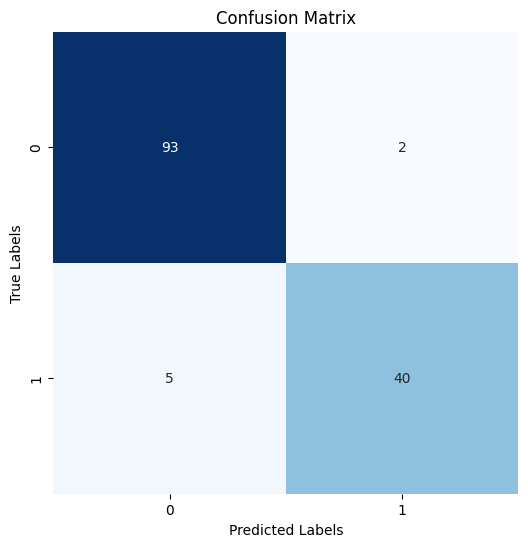

In [31]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#*Menampilkan Distribusi Akurasi dari K-Fold Cross Validation*

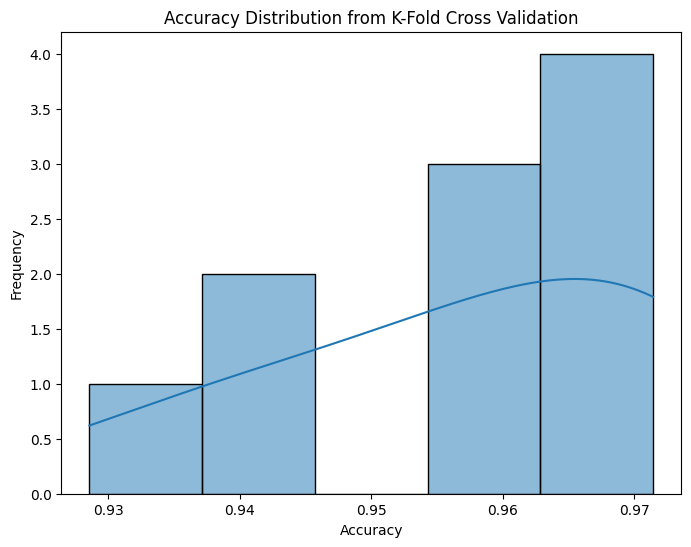

In [32]:
# Visualisasi Distribusi Akurasi dari K-Fold Cross Validation
plt.figure(figsize=(8, 6))
sns.histplot(cv_results, kde=True)
plt.title('Accuracy Distribution from K-Fold Cross Validation')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

#*ROC Curve*

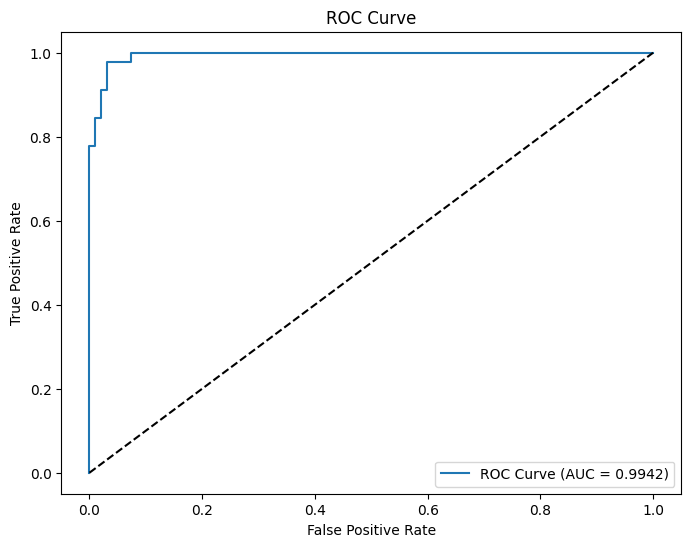

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Menghitung probabilitas kelas positif (kelas 1) untuk ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]

# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal sebagai referensi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#*Precision-Recall Curve*

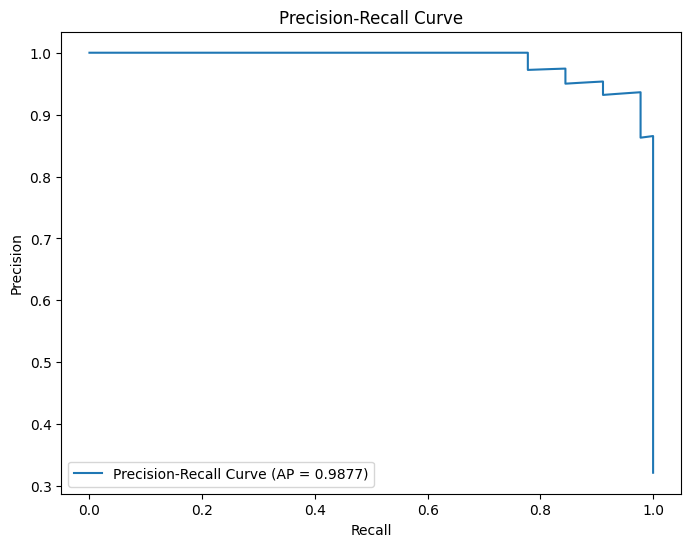

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Menghitung Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {average_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#*Distribusi Prediksi*

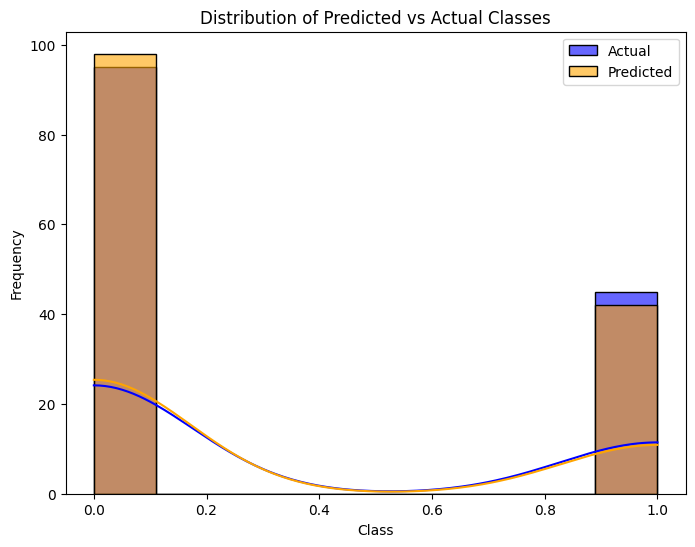

In [35]:
# Distribusi Kelas Prediksi
plt.figure(figsize=(8, 6))
sns.histplot(y_test, label='Actual', color='blue', alpha=0.6, kde=True)
sns.histplot(y_pred, label='Predicted', color='orange', alpha=0.6, kde=True)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Classes')
plt.legend(loc='upper right')
plt.show()

#*Pair Plot (Sebelum dan Sesudah Preprocessing)*

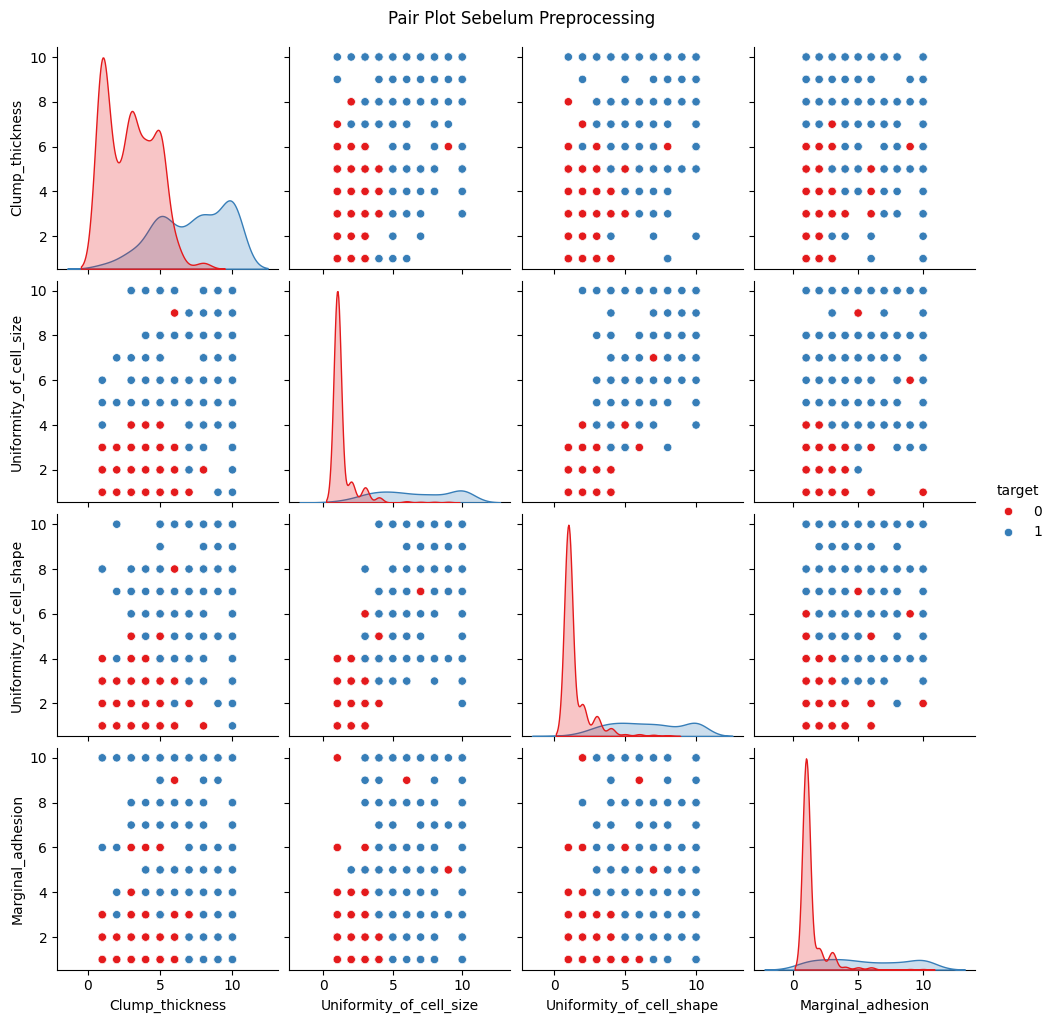

In [36]:
import seaborn as sns

# Mengonversi target menjadi DataFrame agar bisa digabungkan
y_df = pd.DataFrame(y, columns=['target'])

# Gabungkan X dan y sebelum preprocessing untuk pairplot
data_before = pd.concat([X_df_before, y_df], axis=1)

# Pair plot sebelum preprocessing (mengambil beberapa fitur untuk kesederhanaan)
sns.pairplot(data_before, vars=['Clump_thickness', 'Uniformity_of_cell_size',
                                'Uniformity_of_cell_shape', 'Marginal_adhesion'],
             hue='target', diag_kind='kde', palette="Set1")
plt.suptitle('Pair Plot Sebelum Preprocessing', y=1.02)
plt.show()

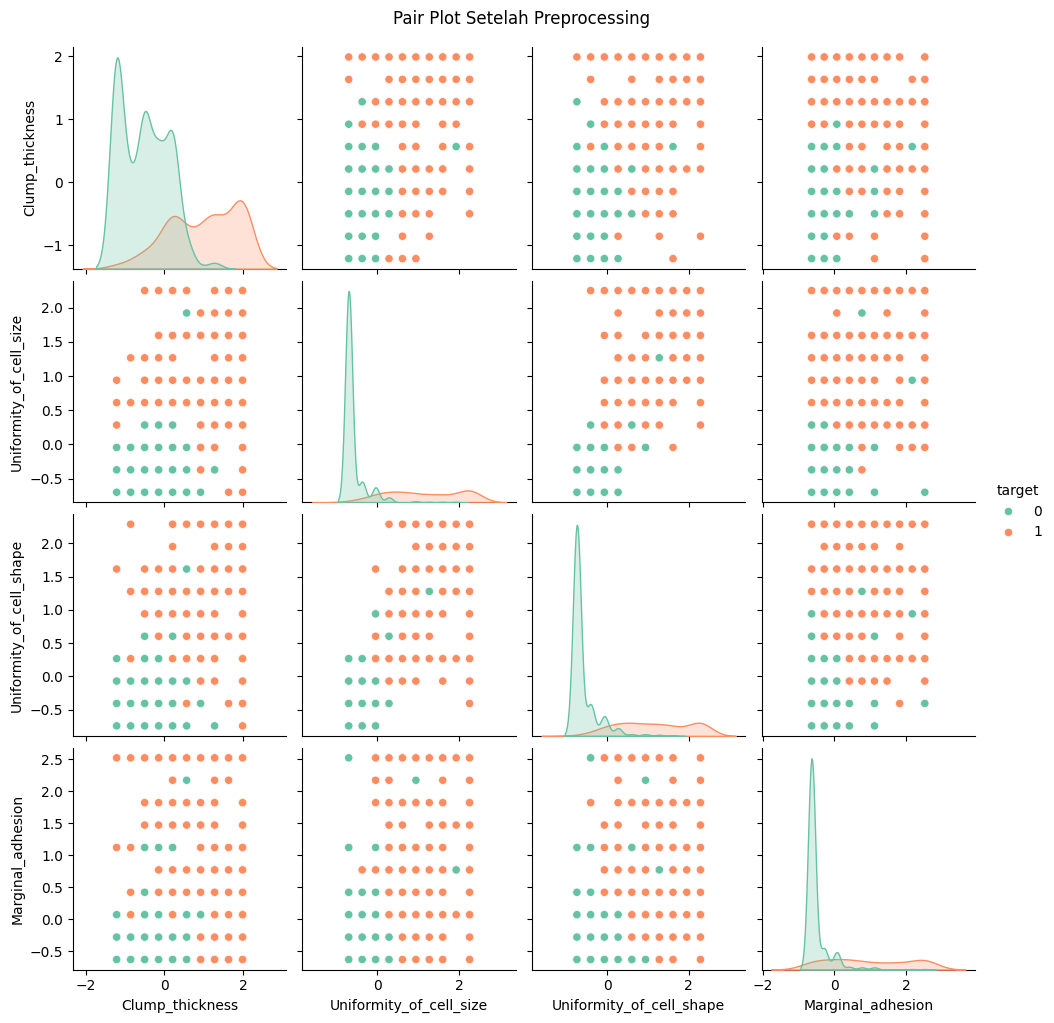

In [37]:
# Gabungkan X_scaled dan y untuk pair plot setelah preprocessing
data_after = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y_df], axis=1)

# Pair plot setelah preprocessing (mengambil beberapa fitur untuk kesederhanaan)
sns.pairplot(data_after, vars=['Clump_thickness', 'Uniformity_of_cell_size',
                               'Uniformity_of_cell_shape', 'Marginal_adhesion'],
             hue='target', diag_kind='kde', palette="Set2")
plt.suptitle('Pair Plot Setelah Preprocessing', y=1.02)
plt.show()

#*Correlation Matrix Heatmap (Sebelum dan Sesudah Preprocessing)*

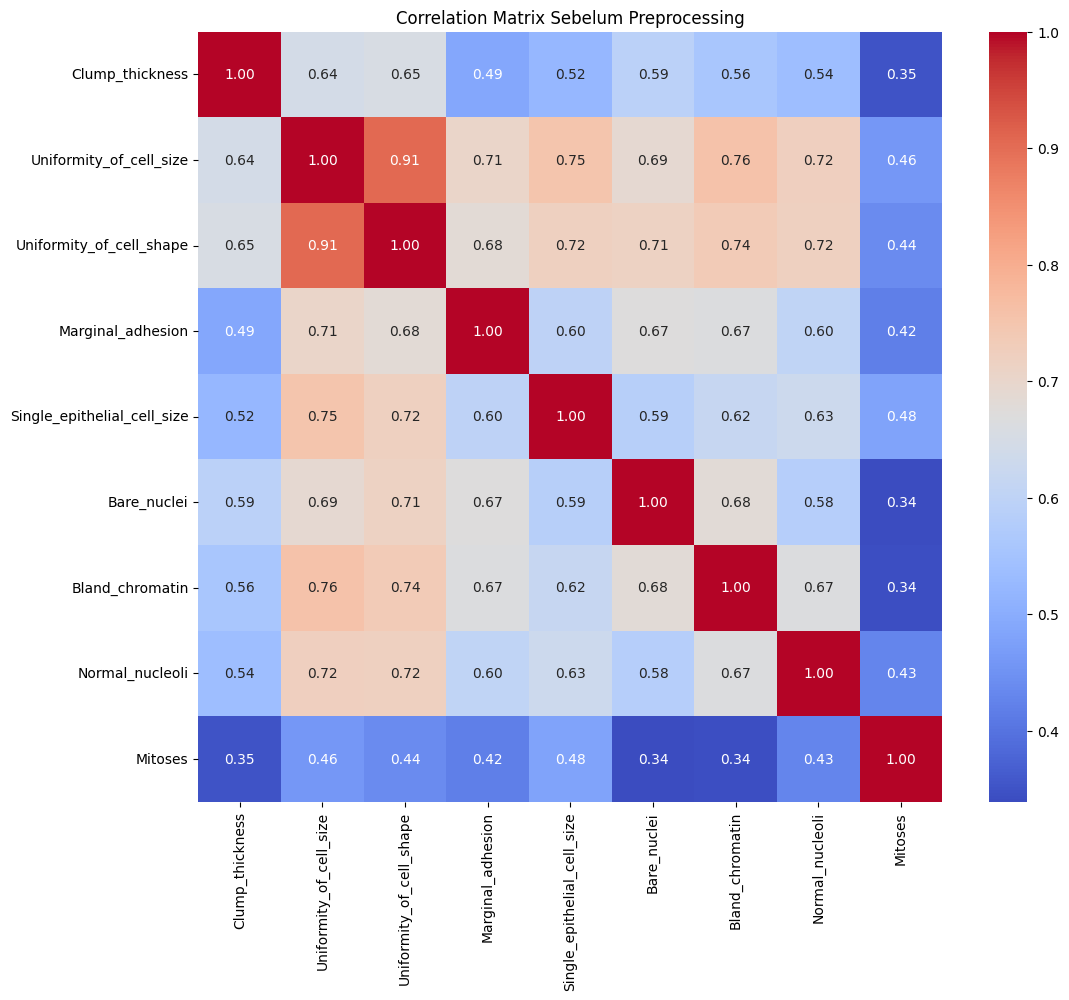

In [38]:
# Correlation matrix heatmap sebelum preprocessing
plt.figure(figsize=(12, 10))
sns.heatmap(X_df_before.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Sebelum Preprocessing')
plt.show()

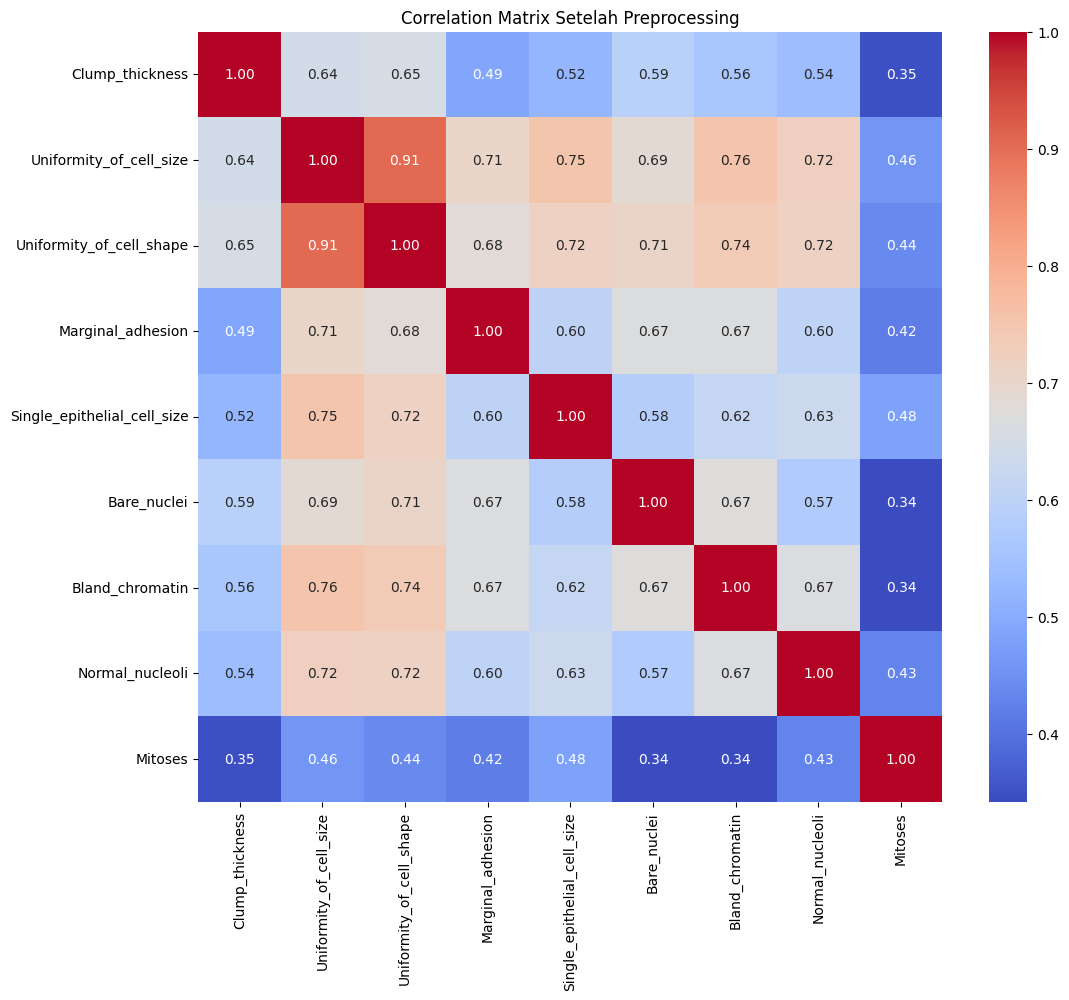

In [39]:
# Correlation matrix heatmap setelah preprocessing
plt.figure(figsize=(12, 10))
sns.heatmap(data_after.drop(columns='target').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Setelah Preprocessing')
plt.show()

#*Density Plot (Sebelum dan Sesudah Preprocessing)*

<ipython-input-40-e79b9fd949b7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_before[col], label=col, shade=True)
<ipython-input-40-e79b9fd949b7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_before[col], label=col, shade=True)
<ipython-input-40-e79b9fd949b7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_before[col], label=col, shade=True)
<ipython-input-40-e79b9fd949b7>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_before[col], label=col, shade=True)
<ipython-input-4

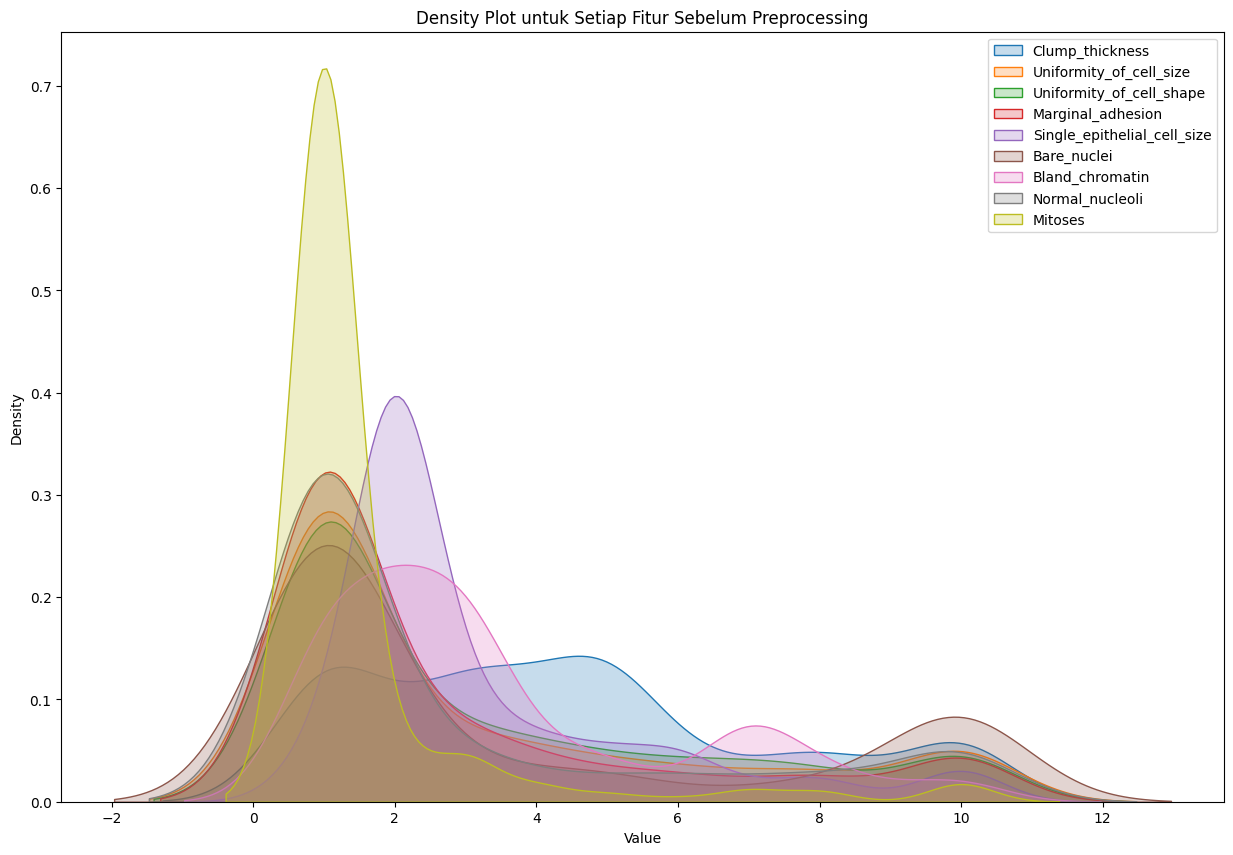

In [40]:
# Density plot sebelum preprocessing
plt.figure(figsize=(15, 10))
for col in X_df_before.columns:
    sns.kdeplot(X_df_before[col], label=col, shade=True)
plt.title('Density Plot untuk Setiap Fitur Sebelum Preprocessing')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

<ipython-input-41-cab398dc3697>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_after[col], label=col, shade=True)
<ipython-input-41-cab398dc3697>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_after[col], label=col, shade=True)
<ipython-input-41-cab398dc3697>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_after[col], label=col, shade=True)
<ipython-input-41-cab398dc3697>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_df_after[col], label=col, shade=True)
<ipython-input-41-ca

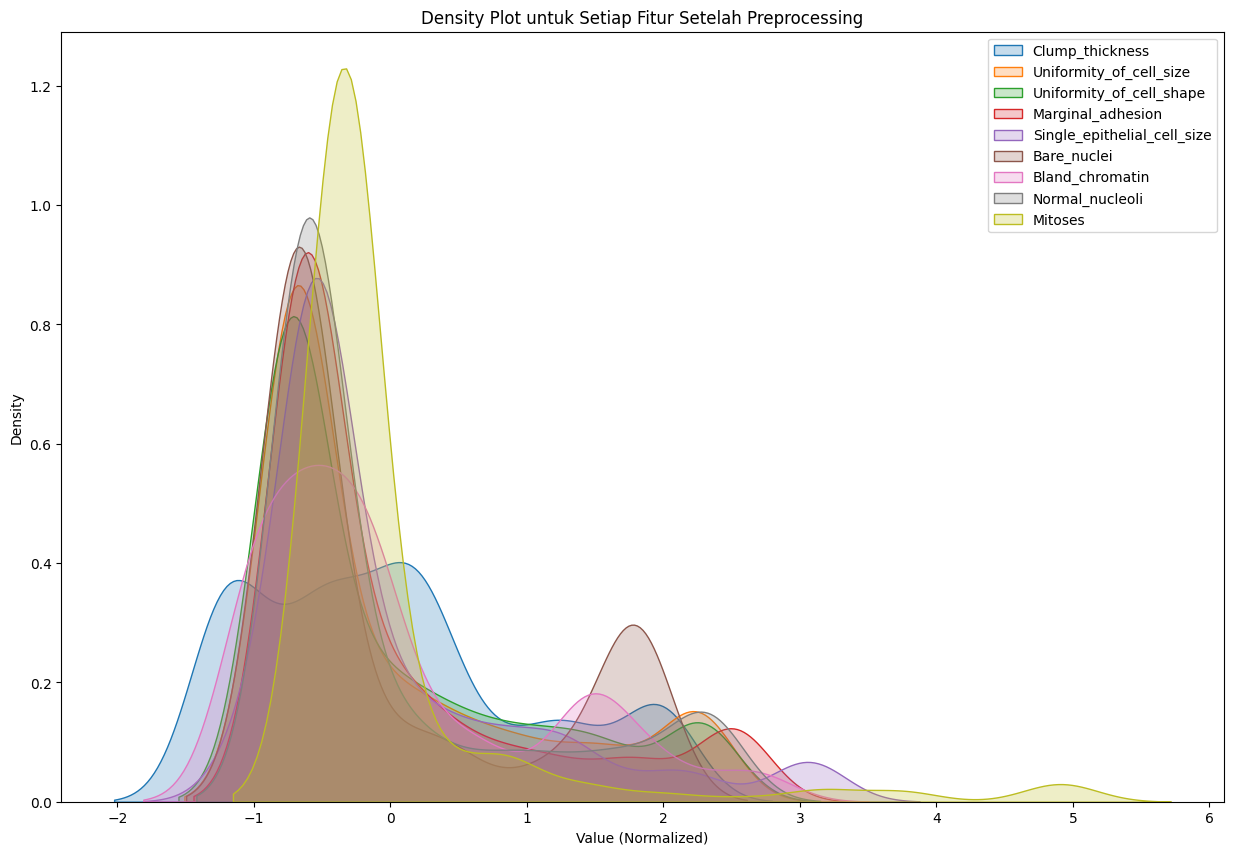

In [41]:
# Density plot setelah preprocessing
plt.figure(figsize=(15, 10))
for col in X_df_after.columns:
    sns.kdeplot(X_df_after[col], label=col, shade=True)
plt.title('Density Plot untuk Setiap Fitur Setelah Preprocessing')
plt.xlabel('Value (Normalized)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()